In [1]:
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 1
%aimport toy_example
%aimport utils.plotting

tensor([0, 0, 0,  ..., 1, 1, 1])


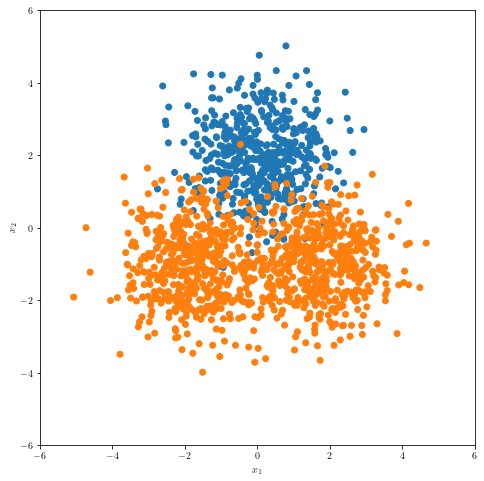

In [5]:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif"
# })
data, labels = toy_example.generate_toy_data(500)
print(labels)
fig, ax = utils.plotting.plot_scatter_latent(data, labels)
fig

In [25]:
inn = toy_example.INN()
inn.cuda()
classifier = toy_example.Classifier()
classifier.cuda()
classifier_kl = toy_example.Classifier()
classifier_kl.cuda()

Node 'coupling_0' takes the following inputs:
	 Output #0 of node 'input' with dims (2,)
	 conditioned on node 'node' with dims (3,)

Node 'coupling_1' takes the following inputs:
	 Output #0 of node 'coupling_0' with dims (2,)
	 conditioned on node 'node' with dims (3,)

Node 'output' takes the following inputs:
	 Output #0 of node 'coupling_1' with dims (2,)



Classifier(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=500, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=500, out_features=500, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=500, out_features=3, bias=True)
  )
)

In [26]:
toy_example.train_inn(inn)

100%|██████████| 1000/1000 [00:12<00:00, 78.04it/s]


In [27]:
toy_example.train_classifier(classifier, inn, kl_loss=False)
toy_example.train_classifier(classifier_kl, inn, kl_loss=False)

100%|██████████| 1000/1000 [00:04<00:00, 201.22it/s]


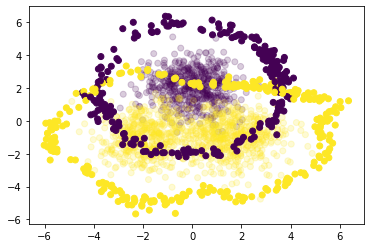

In [36]:
plt.figure()
data, labels = toy_example.generate_toy_data(500)
plt.scatter(data[:, 0], data[:, 1], c=labels.cpu(), alpha=0.2)

data, labels = toy_example.sample_inn_gumbel(inn, 3, 500)
plt.scatter(data[:, 0].cpu(), data[:, 1].cpu(), c=labels.cpu())